# Predictive Modeling using Diabetes Indicators

## The dataset

The dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). It's based on responses from the 2015 Behavioral Risk Factor Surveillance System (BRFSS).

### About the variables


| Feature              | Description                                                 | Values                      |
| --------------------  | ----------------------------------------------------------- | ---------------------------- |
| Diabetes_binary      | diabetes                                                     | 0 = no, 1 = yes                |
| HighBP                | high BP                                                     | 0 = no, 1 = yes                |
| HighChol             | high cholesterol                                             | 0 = no high cholesterol, 1 = high cholesterol |
| CholCheck            | cholesterol check in 5 years                | 0 = no, 1 = yes                |
| BMI                     | Body Mass Index                                          |                                 |
| Smoker               | Have you smoked at least 100 cigarettes in your entire life? | 0 = no, 1 = yes          |
| Stroke                 | (Ever told) you had a stroke                          | 0 = no, 1 = yes                |
| HeartDiseaseorAttack | coronary heart disease (CHD) or myocardial infarction (MI) | 0 = no, 1 = yes        |
| PhysActivity         | physical activity in the past 30 days - not including job | 0 = no, 1 = yes           |
| Fruits                | Consume Fruit 1 or more times per day             | 0 = no, 1 = yes               |
| Veggies              | Consume Vegetables 1 or more times per day  | 0 = no, 1 = yes               |
| HvyAlcoholConsump | (adult men >= 14 drinks per week and adult women >= 7 drinks per week) | 0 = no, 1 = yes |
| AnyHealthcare       | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. | 0 = no, 1 = yes |
| NoDocbcCost         | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? | 0 = no, 1 = yes |
| GenHlth               | Would you say that in general your health is: | 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor |
| MentHlth            | Days of poor mental health scale 1-30 days | 1-30 |
| PhysHlth             | Physical illness or injury days in the past 30 days | 1-30 |
| DiffWalk            | Do you have serious difficulty walking or climbing stairs? | 0 = no, 1 = yes |
| Sex                    | Gender | 0 = female, 1 = male |
| Age                    | 13-level age category (_AGEG5YR see codebook) | 1 = 18-24, 9 = 60-64, 13 = 80 or older |
| Education           | Education level (EDUCA see codebook) | Scale 1-6: 1 = Never attended school or only kindergarten, 2 = elementary, etc. |
| Income               | Income scale (INCOME2 see codebook) | Scale 1-8: 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more |


## Importing Libraries & Reading in Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ydata_profiling import ProfileReport
import math
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\HP\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('C:\\Users\\HP\\Music\\LHLDataCourse\\LHL_final_project\\diabetes_r.csv')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           1.0     0.0      1.0                0.0   
1                   0.0           0.0     1.0      0.0                0.0   
2                   0.0           1.0     1.0      1.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      3.0       5.0      30.0       0.0  1.0   
1            1.0          0.0      3.0       0.0       0.0       0.0  1.0   
2            1.0          0.0      1.0       0.0      10.0       0.0  1.0   
3            1.0          0.0      3.0       0.0       3.0       0.0  1.0   
4            1.0          0.0      2.0       0.0       0.0       0.0  0.0   

    Age  Education  Income  
0   4.0        6.0     8.0  
1  12.0        6.0     8.0  
2  13.0        6.0     8.0  
3  11.0        6.0     8.0  
4   8.0        5.0     8.0

In [3]:
df['Diabetes'] = df['Diabetes_binary']
df.drop(columns=['Diabetes_binary'], inplace=True)

## About the Data: Exploratory Data Analysis

### Profile

In [4]:
# Generating a profile report for all variables
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Number of rows and columns
df.shape

(70692, 22)

In [6]:
# Columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                70692 non-null  float64
 1   HighChol              70692 non-null  float64
 2   CholCheck             70692 non-null  float64
 3   BMI                   70692 non-null  float64
 4   Smoker                70692 non-null  float64
 5   Stroke                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  AnyHealthcare         70692 non-null  float64
 12  NoDocbcCost           70692 non-null  float64
 13  GenHlth               70692 non-null  float64
 14  MentHlth              70692 non-null  float64
 15  PhysHlth           

In [7]:
# Summary Statistics
df.describe().T

count       mean        std   min   25%   50%   75%  \
HighBP                70692.0   0.563458   0.495960   0.0   0.0   1.0   1.0   
HighChol              70692.0   0.525703   0.499342   0.0   0.0   1.0   1.0   
CholCheck             70692.0   0.975259   0.155336   0.0   1.0   1.0   1.0   
BMI                   70692.0  29.856985   7.113954  12.0  25.0  29.0  33.0   
Smoker                70692.0   0.475273   0.499392   0.0   0.0   0.0   1.0   
Stroke                70692.0   0.062171   0.241468   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  70692.0   0.147810   0.354914   0.0   0.0   0.0   0.0   
PhysActivity          70692.0   0.703036   0.456924   0.0   0.0   1.0   1.0   
Fruits                70692.0   0.611795   0.487345   0.0   0.0   1.0   1.0   
Veggies               70692.0   0.788774   0.408181   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     70692.0   0.042721   0.202228   0.0   0.0   0.0   0.0   
AnyHealthcare         70692.0   0.954960   0.207394   0.0   1.0   1.0   1.0   
NoDocbcCost           70692.0   0.093914   0.291712   0.0   0.0   0.0   0.0   
GenHlth               70692.0   2.837082   1.113565   1.0   2.0   3.0   4.0   
MentHlth              70692.0   3.752037   8.155627   0.0   0.0   0.0   2.0   
PhysHlth              70692.0   5.810417  10.062261   0.0   0.0   0.0   6.0   
DiffWalk              70692.0   0.252730   0.434581   0.0   0.0   0.0   1.0   
Sex                   70692.0   0.456997   0.498151   0.0   0.0   0.0   1.0   
Age                   70692.0   8.584055   2.852153   1.0   7.0   9.0  11.0   
Education             70692.0   4.920953   1.029081   1.0   4.0   5.0   6.0   
Income                70692.0   5.698311   2.175196   1.0   4.0   6.0   8.0   
Diabetes              70692.0   0.500000   0.500004   0.0   0.0   0.5   1.0   

                       max  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0  
Diabetes               1.0

In [8]:
#checking unique values in different variables

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   80
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8
Diabetes                               2

### Checking missing values

In [9]:
df.isnull().sum().sum()

0

### Checking duplicate rows

In [10]:
# Checking duplicate rows

duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))

Duplicate Rows :  1635


In [11]:
# removing duplicate rows
df.drop_duplicates(inplace = True)
print("Shape after dropping duplicates: ",df.shape)

Shape after dropping duplicates:  (69057, 22)


In [12]:
# Convert datatype to integer 'int32'

df = df.astype('int32')

In [13]:
# Check the data types of each column after conversion
column_dtypes = df.dtypes
# column_dtypes

### Exploring data relationships and Visualizing

array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center'

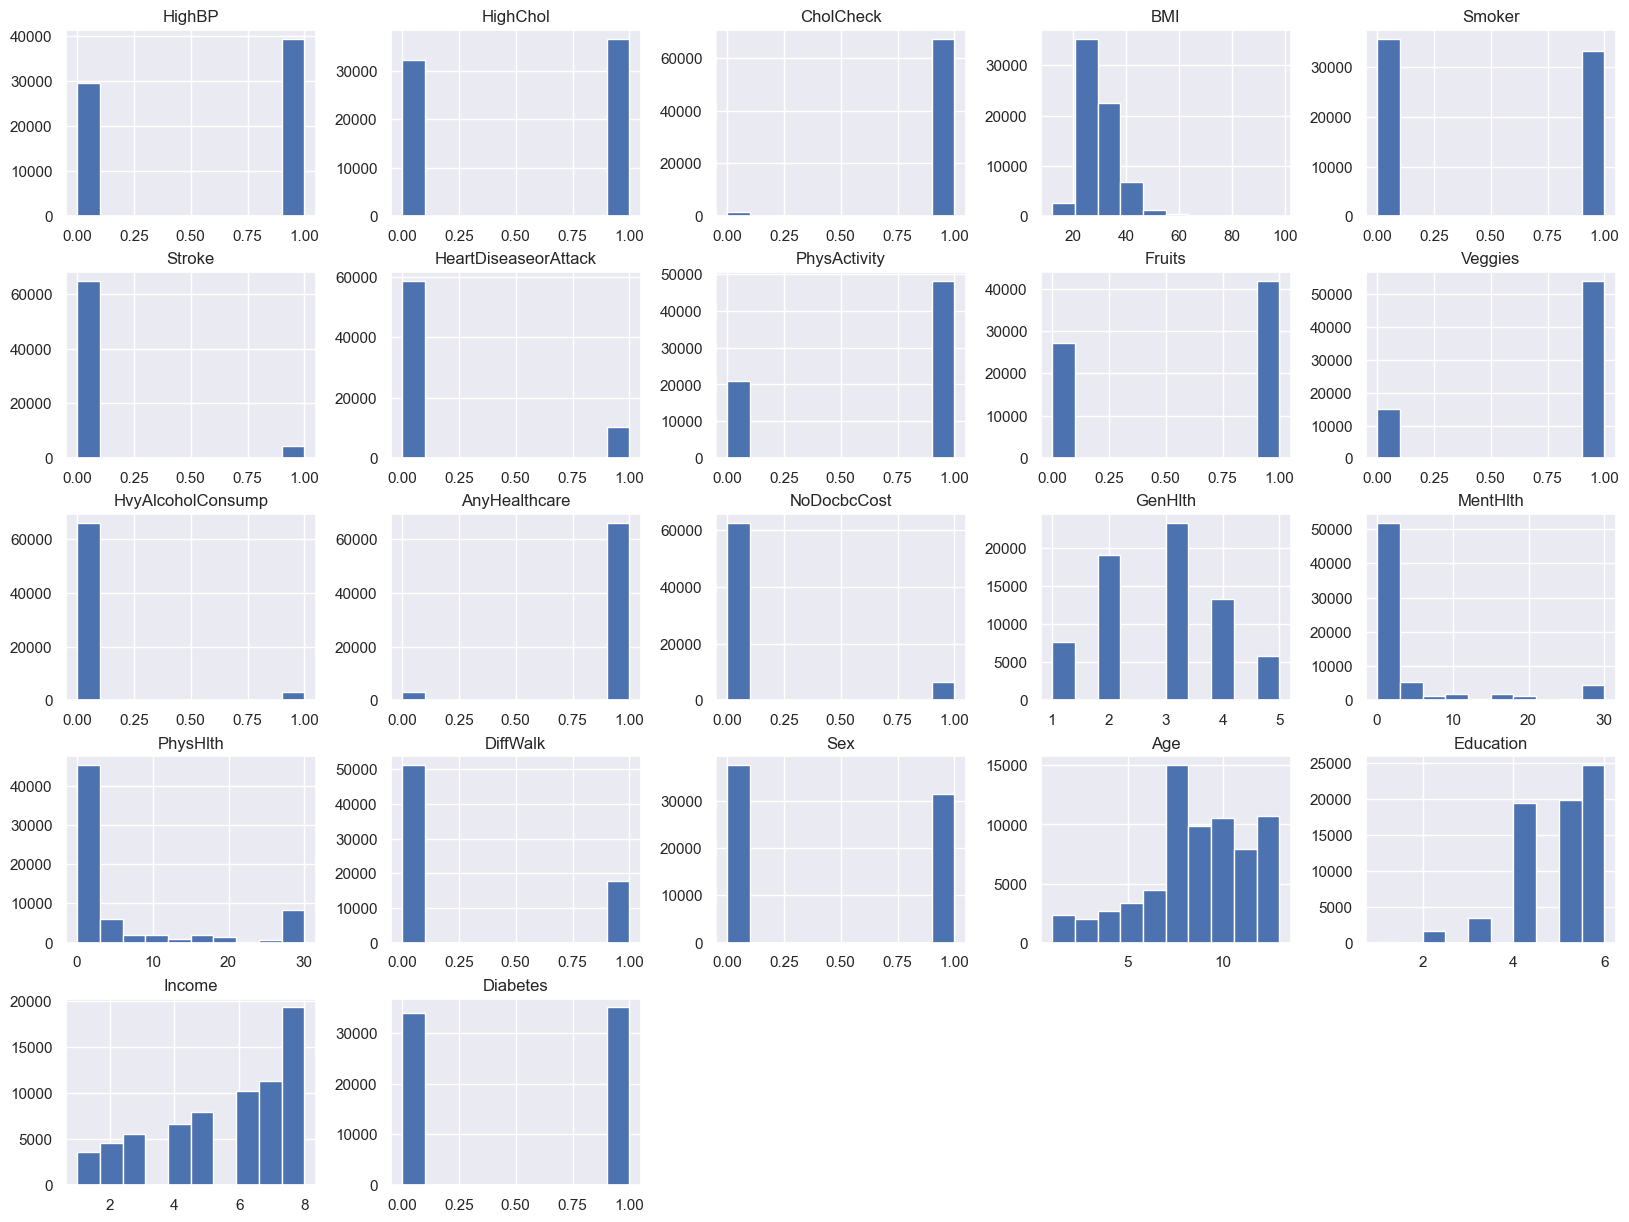

In [14]:
# plotting data distribution plots of the variables
df.hist(figsize=(20,15))

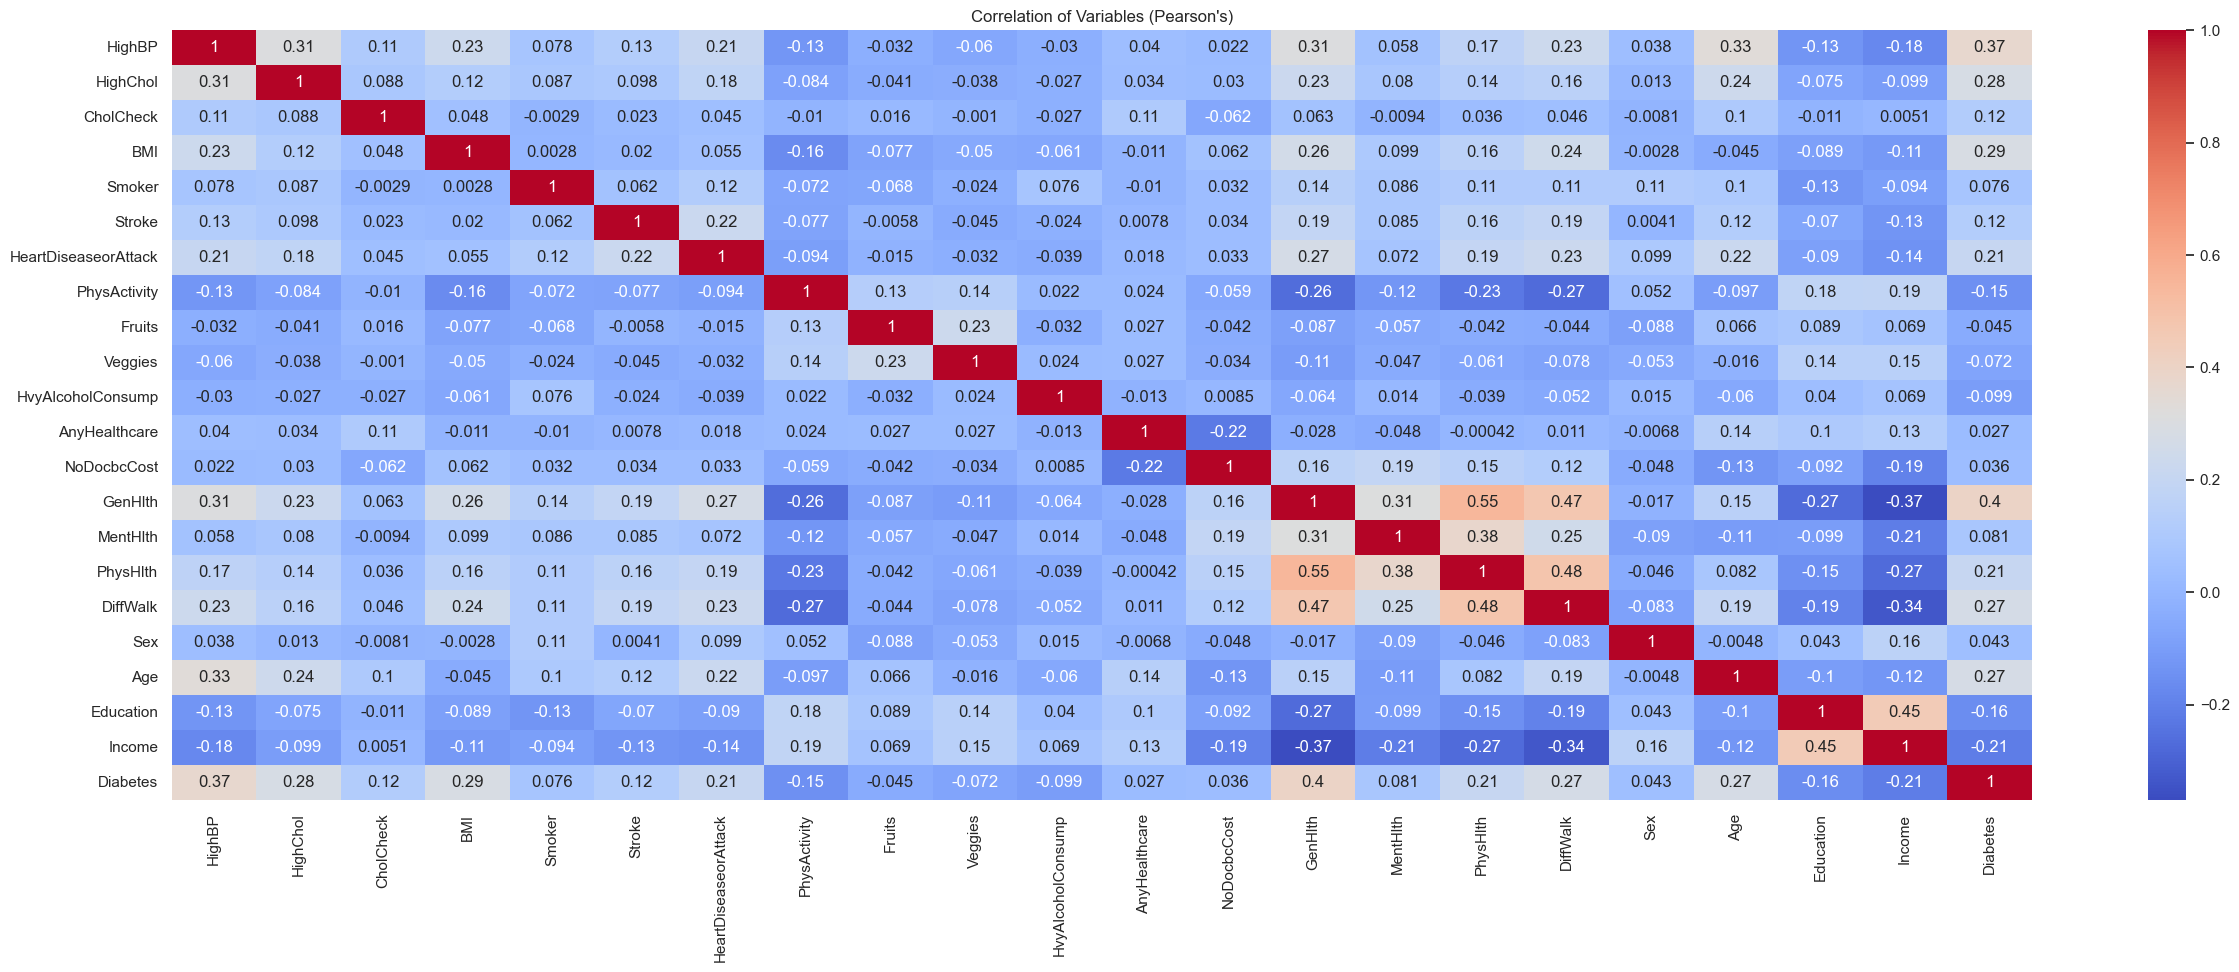

In [15]:
# heatmap correlation of all variables
plt.figure(figsize = (30, 10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')
plt.title("Correlation of Variables (Pearson's)")
plt.show()

<Axes: title={'center': 'Correlation with Diabetes Variable'}>

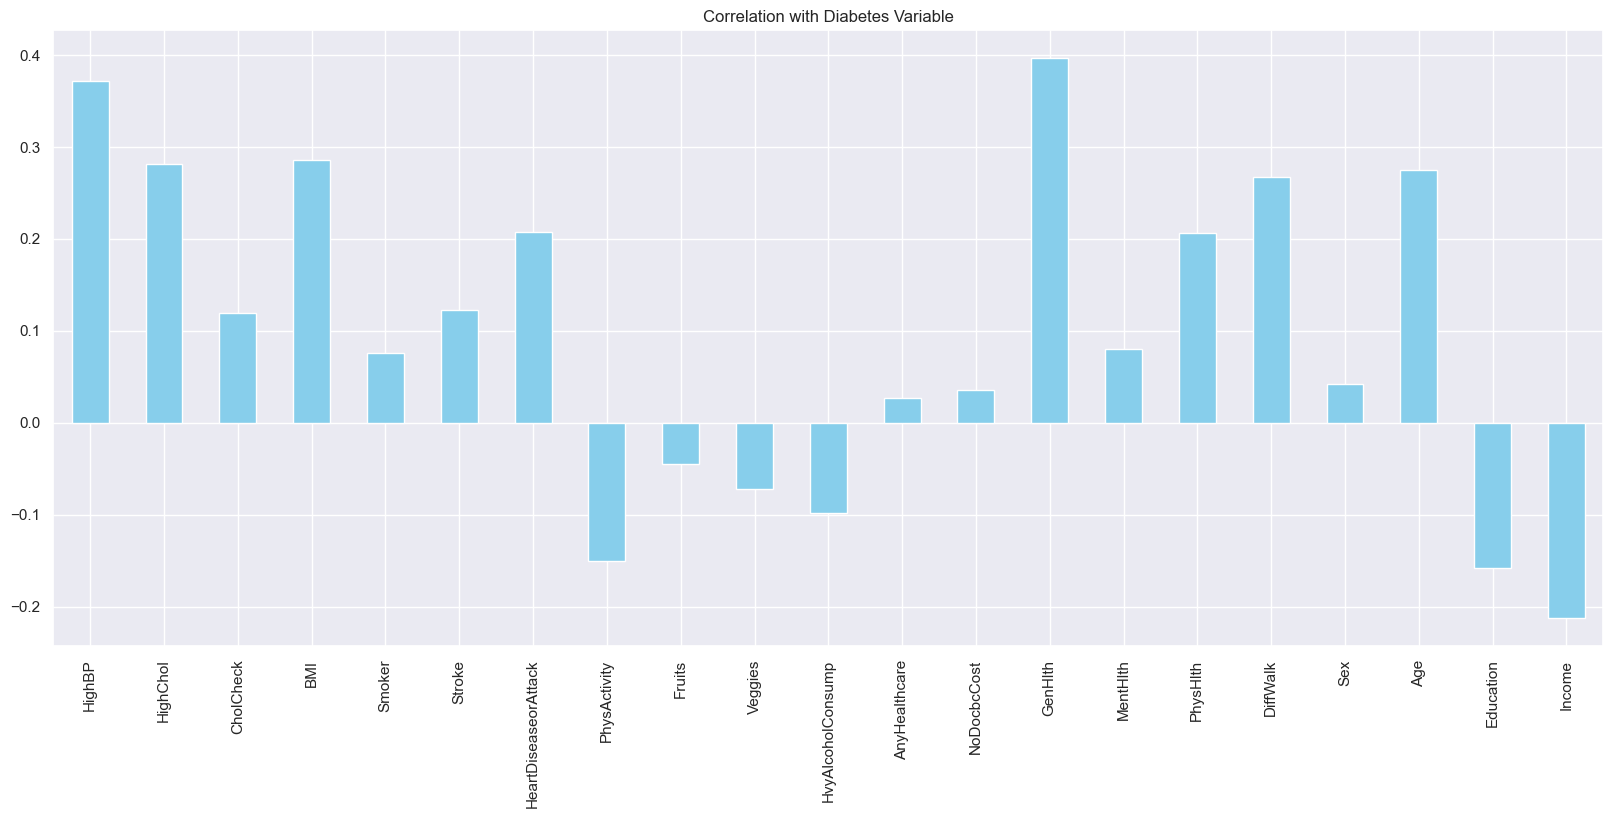

In [16]:
# correlation with the outcome variable
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar',
                                                               grid=True,
                                                               figsize=(20, 8),
                                                               title="Correlation with Diabetes Variable",
                                                               color="skyblue")

# Fitting a Model

Diabetes variable has 2 categories - No diabetes (0), Diabetes (1).

### Logistic Regression

In [17]:
# count of outcome variable values
df.Diabetes.value_counts()

1    35097
0    33960
Name: Diabetes, dtype: int64

The outcome variable is fairly balanced in distribution.

In [18]:
# defining the independent and outcome variables
y = df['Diabetes']
X = df[df.columns[~df.columns.isin(['Diabetes'])]]

In [19]:
col=X.columns[:-1]
col

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education'],
      dtype='object')

In [20]:
# fitting the logistic regression model
X = sm.add_constant(X)

model = sm.Logit(y.astype(float), X.astype(float))

results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.518062
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                69057
Model:                          Logit   Df Residuals:                    69035
Method:                           MLE   Df Model:                           21
Date:                Wed, 11 Oct 2023   Pseudo R-squ.:                  0.2524
Time:                        21:29:04   Log-Likelihood:                -35776.
converged:                       True   LL-Null:                       -47857.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.7960      0.124    -54.719      0.000      -7.039      -6.553

### Feature Selection: Backward elemination (P-value approach)

In [21]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names,
    runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

In [22]:
result = back_feature_elem(X, y, col)

In [23]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                69057
Model:                          Logit   Df Residuals:                    69038
Method:                           MLE   Df Model:                           18
Date:                Wed, 11 Oct 2023   Pseudo R-squ.:                  0.2104
Time:                        21:29:29   Log-Likelihood:                -37789.
converged:                       True   LL-Null:                       -47857.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
HighBP                   0.8568      0.019     44.362      0.000       0.819       0.895
HighChol                 0.5970      0.018     32.282      0.000       0.561       0.633
CholCheck   

### The results: Odds Ratio, Confidence Intervals and Pvalues

In [24]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                      CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
HighBP                    2.268126       2.446512    2.355631     0.0
HighChol                  1.751969       1.883686    1.816634     0.0
CholCheck                 0.402589       0.490219    0.444249     0.0
BMI                       1.031360       1.036559    1.033956     0.0
Smoker                    0.841863       0.904393    0.872568     0.0
Stroke                    1.106586       1.296085    1.197593     0.0
HeartDiseaseorAttack      1.390029       1.551194    1.468402     0.0
PhysActivity              0.778803       0.843400    0.810459     0.0
Fruits                    0.882000       0.950013    0.915375     0.0
Veggies                   0.771809       0.842981    0.806610     0.0
HvyAlcoholConsump         0.379508       0.456749    0.416341     0.0
AnyHealthcare             0.414108       0.490891    0.450868     0.0
NoDocbcCost               0.705769       0.800180    0.751493     0.0
GenHlth             

**Odds Ratio:** The odds ratio is the exponentiated coefficient (e^coef). It tells you how much the odds of having diabetes change for a one-unit change in the independent variable. An odds ratio greater than 1 indicates that an increase in the independent variable is associated with an increase in the odds of having diabetes, while an odds ratio less than 1 indicates a decrease in the odds.

**p-value:** The p-value associated with each coefficient tests the null hypothesis that the coefficient is equal to zero (i.e., the independent variable has no effect on the odds of having diabetes). A low p-value (typically less than 0.05) indicates that the coefficient is statistically significant, suggesting that the independent variable is associated with the outcome.

**Here's a summary of the key findings:**

- Variables: "HighBP," "HighChol," "CholCheck," "BMI," "Smoker," "Stroke," "HeartDiseaseorAttack," "PhysActivity," "Fruits," "Veggies," "HvyAlcoholConsump," "AnyHealthcare," "NoDocbcCost," "GenHlth," "DiffWalk," "Sex," "Age," and "Education" all have odds ratios significantly different from 1 (p-value = 0.0), indicating that they are statistically significant predictors of diabetes.

- For variables with odds ratios greater than 1 (e.g., "HighBP," "HighChol"), an increase in these variables is associated with an increased odds of having diabetes.

- For variables with odds ratios less than 1 (e.g., "PhysActivity," "Fruits," "Veggies," "NoDocbcCost," "Education"), an increase in these variables is associated with a decreased odds of having diabetes.

- All the p-values are very low (0.0), indicating strong statistical significance for all variables.

In summary, these results suggest that all the listed independent variables are statistically significant predictors of diabetes, and their odds ratios provide information about the direction and strength of their relationships with diabetes

# Model Evaluation

In [25]:
# Splitting the dependent and independent variables.

df1 = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
          'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
          'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
          'MentHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Diabetes']]

x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

## Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y, random_state=42)

Test size is set to 0.2, which means 20% of the data will be used for testing and the remaining 80% for training.

Stratify set to y, ensuring the target variable is preserved in training and testing sets; helpful for imbalanced datasets in maintaining a representative distribution of classes.

In [27]:
# Building the model using LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      6792
           1       0.73      0.77      0.75      7020

    accuracy                           0.74     13812
   macro avg       0.74      0.74      0.74     13812
weighted avg       0.74      0.74      0.74     13812



- Precision: out of all the instances predicted as Diabetic , 73% of them are correctly classified.
- Recall: out of all the instances that are *actually Diabetic*, the model correctly identifies 77% of them.

Overall, **the accuracy of the model is 74%**, which indicates the proportion of correctly classified instances in the entire test dataset.

## RandomForest

In [29]:
# Building a model using RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [30]:
# Training data
rfc_train = rfc.predict(x_train)

from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 0.980486921893384


Above: accuracy score of the model's predictions compared to the actual training labels (y_train) using scikit-learn's metrics.accuracy_score.

98% means that the model almost perfectly predicts the labels in the training set; may/may not generalize well to unseen data.

In [31]:
predictions = rfc.predict(x_test)

In [32]:
#Getting the accuracy score for Random Forest


print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7217636837532581


Above:  accuracy score of the model's predictions compared to the actual test labels (y_test).

The result shows that the accuracy on the test data is approximately 72%. This indicates how well the model generalizes to new, unseen data. An accuracy of 72% suggests that the model performs reasonably well on the test data.

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))

print(classification_report(y_test, predictions))

[[4622 2170]
 [1673 5347]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      6792
           1       0.71      0.76      0.74      7020

    accuracy                           0.72     13812
   macro avg       0.72      0.72      0.72     13812
weighted avg       0.72      0.72      0.72     13812



- Precision: out of all the instances predicted as Diabetic , 71% of them are correctly classified.
- Recall: out of all the instances that are *actually Diabetic*, the model correctly identifies 76% of them.

Overall, **the accuracy of the model is 72%**, which indicates the proportion of correctly classified instances in the entire test dataset.



## DecisionTree

In [34]:
#Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [35]:
predictions = dtree.predict(x_test)

In [36]:
#Getting the accuracy score for Decision Tree

print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6441500144801622


Above: indicates that the Decision Tree model achieved an accuracy of approximately 64% on the test data, meaning that about 64% of the test instances were correctly classified by the model.

In [37]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[4424 2368]
 [2547 4473]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6792
           1       0.65      0.64      0.65      7020

    accuracy                           0.64     13812
   macro avg       0.64      0.64      0.64     13812
weighted avg       0.64      0.64      0.64     13812



DecisionTree has the Lowest Precision, Recall and Overall accuracy.

## Features and Testing

In [38]:
#check the coefficients of the trained logistic regression model:
coefficients = logreg.coef_[0]
feature_names = x_train.columns  # Replace 'x_train' with your feature matrix

# display feature names and their coefficients
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

print(importance_df)

                 Feature  Coefficient
0                 HighBP     0.764597
13               GenHlth     0.594621
1               HighChol     0.593748
16                   Sex     0.246228
2              CholCheck     0.242059
17                   Age     0.156865
5                 Stroke     0.130724
3                    BMI     0.071613
15              DiffWalk     0.018554
12           NoDocbcCost     0.005235
9                Veggies     0.000116
14              MentHlth    -0.003994
8                 Fruits    -0.008641
4                 Smoker    -0.039320
6   HeartDiseaseorAttack    -0.056432
7           PhysActivity    -0.076671
11         AnyHealthcare    -0.082072
18             Education    -0.113463
10     HvyAlcoholConsump    -1.283878


## Testing Predictions

- ### Logistic Model

In [39]:
import pickle

# Save the model to a file using pickle
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)

In [40]:
# Load the saved model
with open('logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [41]:
# Make predictions on data using the model
loaded_model.predict(x_test)


array([0, 0, 0, ..., 0, 1, 1])

In [42]:
df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
                    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
                    'MentHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Diabetes']].sample(n=10)


HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
6760        0         0          1   25       0       0                     0   
55509       1         1          1   37       0       0                     1   
38143       0         1          1   34       0       1                     0   
32073       0         0          1   33       0       0                     0   
44862       1         0          1   37       0       0                     1   
9579        1         0          1   18       0       0                     0   
53629       1         0          1   29       0       0                     1   
67597       0         1          1   23       0       0                     0   
58067       1         1          1   22       1       0                     0   
41934       1         1          1   27       1       0                     0   

       PhysActivity  Fruits  Veggies  HvyAlcoholConsump  AnyHealthcare  \
6760              1       1        1                  0              1   
55509             1       0        1                  0              1   
38143             0       1        1                  0              1   
32073             1       1        1                  0              1   
44862             0       1        1                  0              1   
9579              0       1        1                  0              0   
53629             0       0        1                  0              1   
67597             1       1        0                  0              1   
58067             1       1        1                  0              1   
41934             0       0        0                  0              1   

       NoDocbcCost  GenHlth  MentHlth  DiffWalk  Sex  Age  Education  Diabetes  
6760             0        3         0         0    1   12          6         0  
55509            0        3         6         0    0   11          6         1  
38143            0        4        30         1    0    7          5         1  
32073            0        4         5         0    0    6          5         0  
44862            0        5         0         1    0   11          5         1  
9579             0        1         0         1    0    7          4         0  
53629            0        4         0         0    0   12          4         1  
67597            0        3         0         1    0   12          5         1  
58067            0        4         0         0    0    6          4         1  
41934            0        3         0         0    1    9          4         1

In [43]:
loaded_model.predict([[0, 0, 1, 40, 1, 0, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 9, 5]]) #patient 66997

array([1])

In [44]:
loaded_model.predict([[1, 1, 1, 26, 0, 0, 0, 1, 0, 1, 0, 1, 1, 3, 4, 0, 1, 9, 5]]) #patient 41377

array([1])

In [45]:
loaded_model.predict([[0, 0, 1, 31, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 0, 7, 5]]) #patient 20768

array([0])

- ### RandomForest

In [46]:
rfc.feature_importances_

array([0.07756553, 0.04358591, 0.00688824, 0.21327604, 0.03297652,
       0.01191737, 0.02089213, 0.02695923, 0.03378761, 0.02589012,
       0.0105876 , 0.00948931, 0.01512683, 0.11529035, 0.06893453,
       0.02987021, 0.03060997, 0.15333628, 0.07301622])

<Axes: >

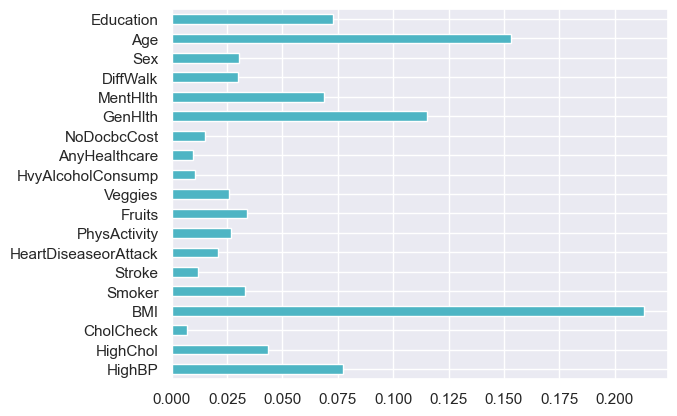

In [47]:
#Plotting feature importances
(pd.Series(rfc.feature_importances_, index=x.columns)
   .plot(kind='barh', color='#4EB5C4'))

BMI appears to have the highest feature importance, followed by Age and Cholesterol Check, the lowest.

In [48]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
rfc.predict_proba(x_test)

Prediction Probabilities


array([[0.705, 0.295],
       [0.535, 0.465],
       [0.345, 0.655],
       ...,
       [0.99 , 0.01 ],
       [0.185, 0.815],
       [0.535, 0.465]])

In [49]:
# save the model using pickle
saved_model = pickle.dumps(rfc)

# load saved model
rfc_from_pickle = pickle.loads(saved_model)

# use the model to make predictions
rfc_from_pickle.predict(x_test)

array([0, 0, 1, ..., 0, 1, 0])

In [50]:
# putting datapoints in the model to return 0 (Non-Diabetic) or 1 (Diabetic)
rfc.predict([[1, 1, 1, 26, 0, 0, 0, 1, 0, 1, 0, 1, 1, 3, 4, 0, 1, 9, 5]]) #patient 41377

array([1])

In [51]:
rfc.predict([[0, 0, 1, 31, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 0, 7, 5]]) #patient 20768

array([0])

In [52]:
selected_rows = df.loc[[41377, 20768], 'Diabetes']
selected_rows

41377    1
20768    0
Name: Diabetes, dtype: int32

In [53]:
# To CSV

df.to_csv('diabetes_clean.csv', index=False)